# 2D Regression with a Single Neuron

We'll implement a script to regress 2D data using a single neuron.

## Load Data

We load the data using the function `load_data()` contained in `loader.py`.

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 0.09539425  0.62586094]
 [ 1.38026523  1.66483856]
 [ 0.88323335  1.21737326]
 [ 0.00583365  0.01259322]
 [-0.65958948  0.39365817]
 [-0.15699403  0.54888271]
 [-0.20260499 -0.48191721]
 [-1.04782585  0.34934672]
 [ 1.72214286 -0.10788593]
 [-0.34130321  0.26006667]]
y_gt: [[ 0.7304667 ]
 [ 0.48457333]
 [ 0.53413991]
 [ 0.20675957]
 [ 1.25324765]
 [ 0.90587675]
 [-0.07931222]
 [ 1.59717256]
 [-1.63002878]
 [ 0.80136988]]


## Visualize Data

We visualize the data using the function `plot_data_2d()` contained in `plotting.py`.

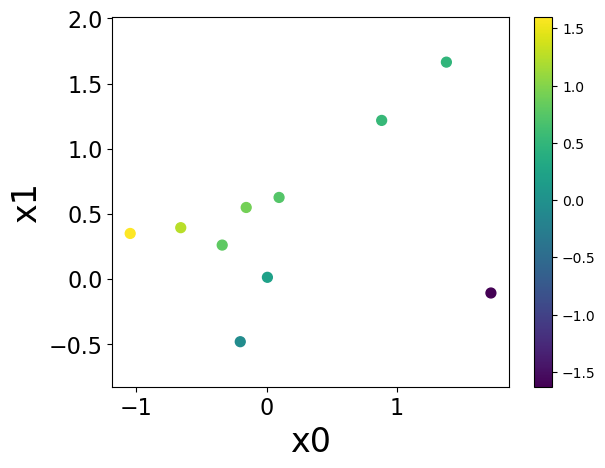

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Neuron

We now create a single neuron with one vectorial weigth `w` and one vectorial input `x` (which can also be a 2D numpy vector if there are multiple imput vectors) ...

In [3]:
def neuron_reg_2d(w, x):
    return x @ w

... randomly initialize its weight vector ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w = rng.standard_normal(size=(2,))

... and obtain its prediction `y_p` for the input data (which has the same shape as `x`).

In [5]:
y_p = neuron_reg_2d(w, x)

## Visualize Predictions by Randomly Initialized Neuron

We now plot its predictions using the function `plot_pred_2d` from `plotting.py`.

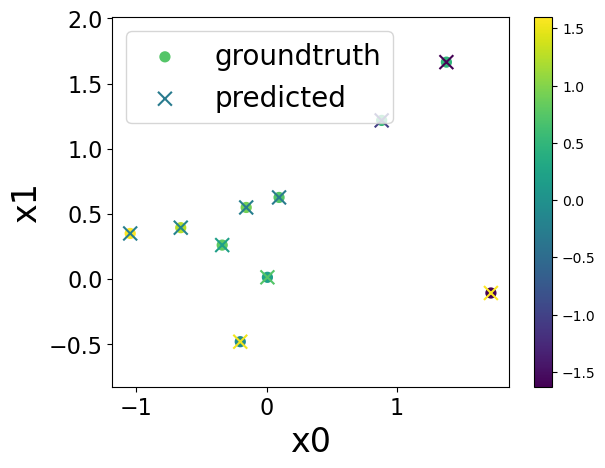

In [6]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p)

## Training

We now train the neuron...

In [7]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # learning rate

for i in range(num_train_iterations):
	selected = rng.integers(0, num_samples) # select random sample
	x_selected = x[selected]
	y_gt_selected = y_gt[selected]

	y_p_selected = neuron_reg_2d(w, x_selected) # neuron prediction
	
	error = y_p_selected - y_gt_selected # calculate error

	w -= eta * error * x_selected # update neuron weights

	print(f"i={i} w0={w[0]:.2f} w0={w[1]:.2f} error={error[0]:.2f}")

i=0 w0=0.24 w0=-1.03 error=0.54
i=1 w0=0.24 w0=-1.03 error=-0.22
i=2 w0=0.20 w0=-1.00 error=-1.15
i=3 w0=-0.03 w0=-0.92 error=-2.16
i=4 w0=-0.32 w0=-0.91 error=1.69
i=5 w0=-0.32 w0=-0.91 error=-0.22
i=6 w0=-0.34 w0=-0.83 error=-1.35
i=7 w0=-0.32 w0=-0.75 error=-1.28
i=8 w0=-0.32 w0=-0.75 error=-0.22
i=9 w0=-0.48 w0=-0.70 error=-1.52
i=10 w0=-0.16 w0=-0.31 error=-2.32
i=11 w0=-0.16 w0=-0.31 error=-0.21
i=12 w0=-0.18 w0=-0.25 error=-1.05
i=13 w0=-0.26 w0=-0.21 error=-1.23
i=14 w0=-0.26 w0=-0.21 error=-0.21
i=15 w0=-0.17 w0=-0.08 error=-1.02
i=16 w0=-0.40 w0=-0.07 error=1.34
i=17 w0=-0.40 w0=-0.02 error=-0.81
i=18 w0=-0.25 w0=0.16 error=-1.06
i=19 w0=-0.17 w0=0.25 error=-0.56
i=20 w0=-0.19 w0=0.27 error=-0.68
i=21 w0=-0.19 w0=0.31 error=-0.58
i=22 w0=-0.16 w0=0.35 error=-0.23
i=23 w0=-0.22 w0=0.39 error=-1.01
i=24 w0=-0.35 w0=0.43 error=-1.23
i=25 w0=-0.47 w0=0.47 error=-1.08
i=26 w0=-0.48 w0=0.48 error=-0.52
i=27 w0=-0.45 w0=0.53 error=-0.38
i=28 w0=-0.42 w0=0.56 error=-0.23
i=29 w0=-0.4

... and plot its performance, again using the function `plot_pred_1d` from `plotting.py`.

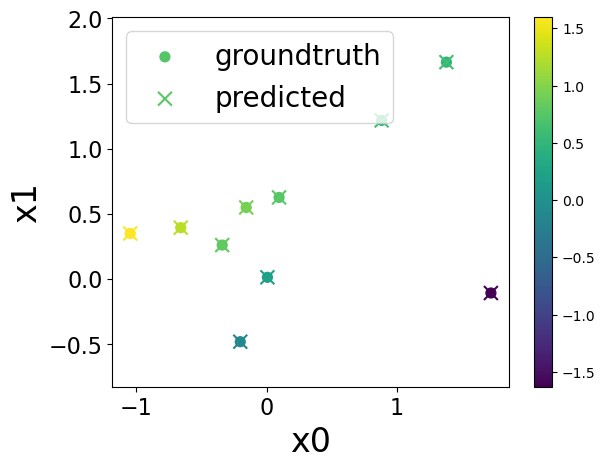

In [8]:
plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x))

## Testing

We now check how the trained neuron works on the test data.

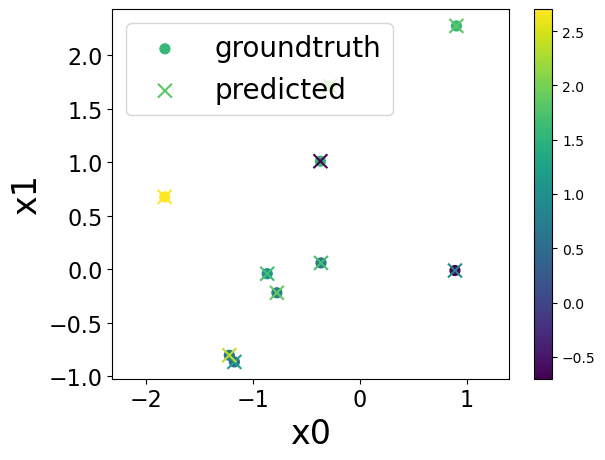

In [9]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=neuron_reg_2d(w, x))